C:\Users\gparu\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


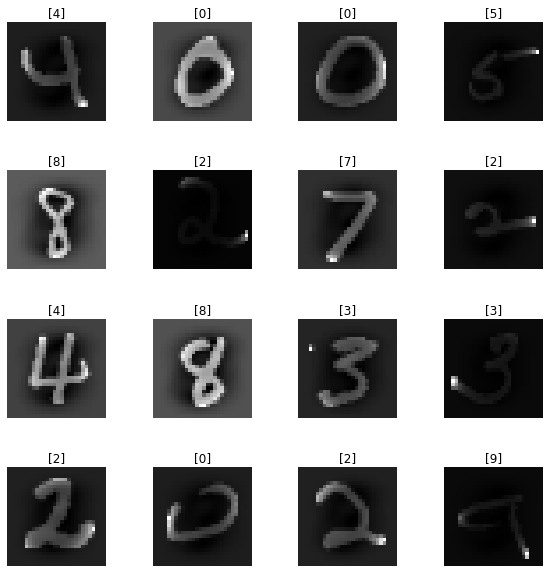

Cost at iteration 0: [2.30035927]
Cost at iteration 100: [0.1178781]
Cost at iteration 200: [0.06746833]
Cost at iteration 300: [0.04372592]
Cost at iteration 400: [0.03007107]
Cost at iteration 500: [0.02161782]
Cost at iteration 600: [0.01615632]
Cost at iteration 700: [0.01249978]
Cost at iteration 800: [0.00996294]
Cost at iteration 900: [0.00813975]
Accuracy: 97.16%


In [2]:

# -*- coding: utf-8 -*-
"""
Created on Sat Jan 28 19:04:18 2023

@author: gparu
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import pickle
data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']
#normalize the data
stand_dev = np.std(X, axis=0, keepdims=True)
mean=np.mean(X, axis=0, keepdims=True)
X = (X-mean)/(stand_dev+1e-7)
# reshape the X data to (num_samples, height, width, channels)
X = X.reshape(-1, 28, 28, 1)

# split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

# choose 16 random indices from the train set
indices = random.sample(range(len(X_train)), 16)

# select the corresponding images and labels
images = X_train[indices]
labels = y_train[indices]

# create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

# plot the images in the subplots
for i, ax in enumerate(axes):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(labels[i])
    ax.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return np.maximum(0, z)

def softmax(z):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    # subtract the max for numerical stability
    z -= np.max(z, axis=-1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=-1, keepdims=True)
def init_params(input_size, hidden_size, output_size):
    """
    Inputs:
        input_size: size of input layer (784,)
        hidden_size: size of hidden layer (integer)
        output_size: size of output layer (10,)
    Returns:
        parameters: dictionary containing the weights and biases for each layer
    """
    np.random.seed(0)
    
    W1 = np.random.normal(0, 0.01, (input_size, hidden_size))
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.normal(0, 0.01, (hidden_size, output_size))
    b2 = np.zeros((1, output_size))
    
    return {0: W1, 1: b1, 2: W2, 3: b2}
def forward_propg(X, parameters):
    """
    X: input data
    parameters: dictionary containing the weights and biases for each layer
    returns: logits, output of each layer z1,z2,a1,a2
    """
    W1 = parameters[0]
    b1 = parameters[1]
    W2 = parameters[2]
    b2 = parameters[3]
    X2=X.reshape(X.shape[0], -1)
    # linear forward
    z1 = np.dot(X2, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    logits=z2
    cache = {0: z1, 1: a1, 2: z2, 3: logits}
    return logits, cache
def backward_propg(parameters, X, y, cache, learning_rate):
    """
    parameters: dictionary containing the weights and biases for each layer
    X: input data
    y: true labels
    cache: dictionary containing the output of the forward propagation step
    learning_rate: step size for updating the weights
    returns: updated parameters
    """
    W2 = parameters[2]
    X=X.reshape(48000, 784)
    # backward prop
    m = X.shape[0]
    logits = softmax(cache[3])
    a1 = cache[1]
    dz2 = logits/m
    for i in range(m):
        dz2[i][y[i]]-=1/m
    dw2 = np.dot(a1.T, dz2)
    db2 = (1/m)*np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, W2.T)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dw1 = np.dot(X.T, dz1)
    db1 = (1/m)*np.sum(dz1, axis=0, keepdims=True)
    # update parameters
    parameters[0] = parameters[0] - learning_rate * dw1
    parameters[1] = parameters[1] - learning_rate * db1
    parameters[2] = parameters[2] - learning_rate * dw2
    parameters[3] = parameters[3] - learning_rate * db2
    
    return parameters
def cost_func(logits, X, y):
    """
    parameters: dictionary containing the weights and biases for each layer
    X: input data
    y: true labels
    returns: cross-entropy loss
    """
    m = X.shape[0]
    logits2=softmax(logits)
    loss=0
    for i in range(m):
        loss -= (np.log(logits2[i][y[i]]))
    return loss/m
def train(X, y, hidden_nodes, epochs=1000, lr=1):
    """
    hidden_nodes: no. of nodes in hidden layer
    should return the updated optimize weights.
    """
    # initialize weights
    parameters = init_params(input_size=784, hidden_size=hidden_nodes, output_size=10)
    
    for i in range(epochs):
        # forward propagation
        logits = forward_propg(X, parameters)[0]
        cache = forward_propg(X, parameters)[1]
        
        # print cost every 100 iterations
        if i % 100 == 0:
            cost = cost_func(logits, X, y)
            print("Cost at iteration {}: {}".format(i, cost))
        
        # backward propagation
        parameters = backward_propg(parameters, X, y, cache, learning_rate=lr)
    
    return parameters
def predict(X, updated_weights):
    """
    returns the prediction in [0,9] for each element in X
    """
    # perform forward propagation
    logits = forward_propg(X, updated_weights)[0]
    
    # apply softmax to get probabilities
    probabilities = softmax(logits)
    
    # get the index of the highest probability for each sample
    predictions = np.argmax(probabilities, axis=1)
    return predictions
def accuracy(predictions, y):
    """
    prints % accuracy
    """
    count=0
    for i in range(len(predictions)):
        if predictions[i]==y[i]:
            count+=1
    accuracy=count/len(predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
roll_num = "22B1053" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

# train the model
updated_weights = train(X_train, y_train, hidden_dim)

# make predictions
predictions = predict(X_val, updated_weights)

# calculate accuracy
accuracy(predictions, y_val)

# save the model
model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': updated_weights[0], # layer 0 weight (784, z)
    'layer_0_bias': updated_weights[1], # layer 0 bias (z, 1)
    'layer_1_wt': updated_weights[2], # layer 1 weight (z, 10)
    'layer_1_bias': updated_weights[3] # layer 1 bias (10, 1)
}
model_dict['layer_0_wt'].reshape(784, hidden_dim)
model_dict['layer_0_bias'].reshape(hidden_dim, 1)
model_dict['layer_1_wt'].reshape(hidden_dim, 10)
model_dict['layer_1_bias'].reshape(10, 1)
with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)